In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = "svg"
import matplotlib.pyplot as plt

import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"

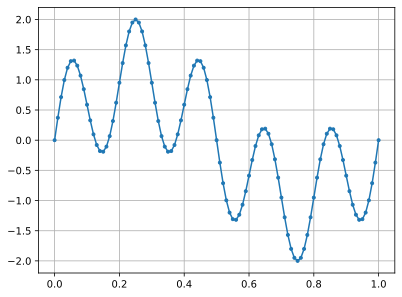

In [11]:
# define no of grid points in space
n  = 101
L = 1.0
x = np.linspace(0,L,n)
dx = x[1] -x[0]

#initial condition
#U0 =  np.sin(2.0*np.pi*x)
U0 = np.sin(2.0*np.pi*x) + np.sin(10.0*np.pi*x)
plt.plot(x,U0,'-o',markersize=3)
plt.grid()



In [14]:
#time domain 
dt = 0.001
tend = 10
mu = 1e-2 #thermal diffusibility 

sol =[] #container to store sol in time 
sol.append(U0) #initial condition
t=0.0 #tstart
# Let's move in time
while t < tend:
    un = sol[-1]  #grab sol at time lvl n
    #new array for the sol at n+1 (np1)
    unp1 = np.zeros_like(un)
    # We need unp1 only at interior points
    unp1[1:-1] = un[1:-1] + mu*dt/dx/dx * ( un[:-2]-2*un[1:-1]+ un[2:])
    #set bcs
    unp1[0] = 0.0
    unp1[-1] = 0.0
    sol.append(unp1)
    t = t + dt
    

    


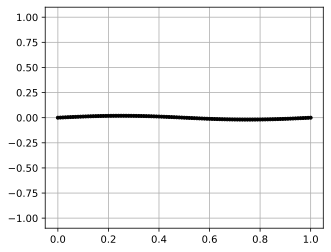

In [16]:
ims = []
fig = plt.figure(figsize=[5,4],dpi = 100)
plt.grid()

i=0
for solution in sol:
    if (i%40 == 0):
        im = plt.plot(x,solution,'-ko',markersize=3,animated=True)
        plt.ylim(-1.1,1.1)
        ims.append(im)
    i = i+1
ani = animation.ArtistAnimation(fig,ims,interval=35,blit=True,repeat_delay=1000)
ani